In [1]:
import keras
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Download Dataset

In [2]:
!wget http://files.fast.ai/data/dogscats.zip

--2019-06-06 15:45:39--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  16.4MB/s    in 52s     

2019-06-06 15:46:32 (15.7 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



# Prepare dataset

In [0]:
!unzip dogscats.zip

In [0]:
dataset_path = "./dogscats"
training_set = dataset_path + "/train"
validation_set =dataset_path + "/valid"

In [5]:
print("Number of cat images in the training set:", len(os.listdir(training_set + "/cats")))

Number of cat images in the training set: 11500


In [6]:
print("Number of dog images in the training set:", len(os.listdir(training_set + "/dogs")))

Number of dog images in the training set: 11500


In [7]:
print("Number of cat images in the validation set:", len(os.listdir(validation_set + "/cats")))

Number of cat images in the validation set: 1000


In [8]:
print("Number of dog images in the validation set:", len(os.listdir(validation_set + "/dogs")))

Number of dog images in the validation set: 1000


# Model architecture

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
__________

# Cost function, optimizer, ...

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data generator

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# validation data should not be augmented!

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        training_set,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_set,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Training

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=312,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=78)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
312/312 [==============================] - 203s 651ms/step - loss: 0.7455 - acc: 0.5969 - val_loss: 0.5902 - val_acc: 0.6850
Epoch 2/50
312/312 [==============================] - 195s 624ms/step - loss: 0.6449 - acc: 0.6505 - val_loss: 0.5600 - val_acc: 0.7204
Epoch 3/50
312/312 [==============================] - 193s 619ms/step - loss: 0.6121 - acc: 0.6795 - val_loss: 0.5111 - val_acc: 0.7420
Epoch 4/50
312/312 [==============================] - 194s 622ms/step - loss: 0.5899 - acc: 0.6983 - val_loss: 0.5145 - val_acc: 0.7404
Epoch 5/50
312/312 [==============================] - 194s 621ms/step - loss: 0.5673 - acc: 0.7154 - val_loss: 0.4657 - val_acc: 0.7801
Epoch 6/50
312/312 [==============================] - 194s 621ms/step - loss: 0.5580 - acc: 0.7200 - val_loss: 0.5302 - val_acc: 0.7447
Epoch 7/50
312/312 [==============================] - 194s 621ms/step - loss: 0.5445 - acc: 0.7326 - val_loss: 0.4567 - val_acc: 0.7805


# Plot accuracy and loss

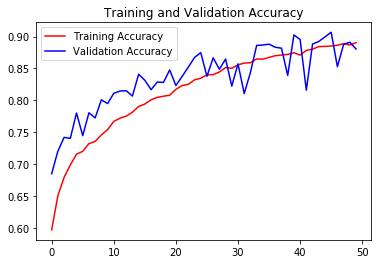

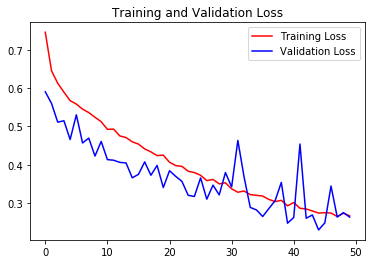

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Save the model

In [0]:
model.save('cnn_from_scratch.h5')

# Evaluate the model

In [16]:
test_loss, test_acc = model.evaluate_generator(validation_generator, steps=20)
print('Accuracy on Validation Set:', test_acc)

Accuracy on Validation Set: 0.8863636363636364


# Train more with lower learning rate

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=312,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=78)

Epoch 1/10
312/312 [==============================] - 201s 645ms/step - loss: 0.2588 - acc: 0.8915 - val_loss: 0.2275 - val_acc: 0.9134
Epoch 2/10
312/312 [==============================] - 194s 622ms/step - loss: 0.2490 - acc: 0.8950 - val_loss: 0.2222 - val_acc: 0.9183
Epoch 3/10
312/312 [==============================] - 194s 623ms/step - loss: 0.2447 - acc: 0.8972 - val_loss: 0.2223 - val_acc: 0.9189
Epoch 4/10
312/312 [==============================] - 194s 621ms/step - loss: 0.2422 - acc: 0.9002 - val_loss: 0.2188 - val_acc: 0.9214
Epoch 5/10
312/312 [==============================] - 194s 623ms/step - loss: 0.2460 - acc: 0.8983 - val_loss: 0.2205 - val_acc: 0.9214
Epoch 6/10
312/312 [==============================] - 194s 623ms/step - loss: 0.2417 - acc: 0.8985 - val_loss: 0.2183 - val_acc: 0.9229
Epoch 7/10
312/312 [==============================] - 195s 625ms/step - loss: 0.2360 - acc: 0.9002 - val_loss: 0.2193 - val_acc: 0.9191
Epoch 8/10
312/312 [============================

# Save the model

In [0]:
model.save('cnn_from_scratch_lower_lr.h5')

# Evaluate the model

In [19]:
test_loss, test_acc = model.evaluate_generator(validation_generator, steps=20)
print('Accuracy on Validation Set:', test_acc)

Accuracy on Validation Set: 0.922077922077922
